---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Assignment 4 - Hypothesis Testing
This assignment requires more individual learning than previous assignments - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

**Hypothesis**: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

The following data files are available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.

Each function in this assignment below is worth 10%, with the exception of ```run_ttest()```, which is worth 50%.

In [8]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [9]:
import re

In [2]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. '''
    
    with open('university_towns.txt') as file:
        utdata = file.readlines()
    utdata = [x.strip('\n') for x in utdata]
    
    df = pd.DataFrame(columns=["State", "RegionName"])
    cur_state = ''
    town = ''
    loc = 0
    for x in utdata:
        if (re.search(r'\[edit\]', x)):
            cur_state = re.sub(r'\[edit\]$', '', x)
        else:
            town = re.sub(r' \(.*$', '', x)
            df.loc[loc] = [cur_state, town]
            loc = loc +1
    
    return df

In [24]:
get_list_of_university_towns()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
5,Alabama,Troy
6,Alabama,Tuscaloosa
7,Alabama,Tuskegee
8,Alaska,Fairbanks
9,Arizona,Flagstaff


In [3]:
with open('university_towns.txt') as file:
    utdata = file.readlines()
utdata = [x.strip('\n') for x in utdata]
utdata

['Alabama[edit]',
 'Auburn (Auburn University)[1]',
 'Florence (University of North Alabama)',
 'Jacksonville (Jacksonville State University)[2]',
 'Livingston (University of West Alabama)[2]',
 'Montevallo (University of Montevallo)[2]',
 'Troy (Troy University)[2]',
 'Tuscaloosa (University of Alabama, Stillman College, Shelton State)[3][4]',
 'Tuskegee (Tuskegee University)[5]',
 'Alaska[edit]',
 'Fairbanks (University of Alaska Fairbanks)[2]',
 'Arizona[edit]',
 'Flagstaff (Northern Arizona University)[6]',
 'Tempe (Arizona State University)',
 'Tucson (University of Arizona)',
 'Arkansas[edit]',
 'Arkadelphia (Henderson State University, Ouachita Baptist University)[2]',
 'Conway (Central Baptist College, Hendrix College, University of Central Arkansas)[2]',
 'Fayetteville (University of Arkansas)[7]',
 'Jonesboro (Arkansas State University)[8]',
 'Magnolia (Southern Arkansas University)[2]',
 'Monticello (University of Arkansas at Monticello)[2]',
 'Russellville (Arkansas Tech Un

In [21]:
import re
import pandas as pd

df = pd.DataFrame(columns=["State", "RegionName"])
cur_state = ''
# state_counter = 0
town = ''
loc = 0
for x in utdata:
    if (re.search(r'\[edit\]', x)):
        cur_state = re.sub(r'\[edit\]$', '', x)
#         print(cur_state)
        state_counter = state_counter +1
    else:
        town = re.sub(r' \(.*$', '', x)
        df.loc[loc] = [cur_state, town]
        loc = loc +1
# print(state_counter)
df

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
5,Alabama,Troy
6,Alabama,Tuscaloosa
7,Alabama,Tuskegee
8,Alaska,Fairbanks
9,Arizona,Flagstaff


In [12]:
loc

0

In [8]:
import re
test = 'tesst[edit]'
testtest = re.sub(r'\[edit\]', '',test)
testtest


'tesst'

In [ ]:
import pandas as pd



In [9]:
test

'tesst[edit]'

In [3]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    
    df = pd.read_excel("gdplev.xls", header=None, parse_cols="E:G", skiprows=8)
    df.drop(columns=1, inplace=True)
    df.columns = ['quarter', 'gdp_chained']
    df['quarter'] = pd.PeriodIndex(df['quarter'], freq='Q')
    df.set_index('quarter', inplace=True)
    df_change = df.diff()
    df_change = df_change[df_change.index.year>=2000]
    rec_start = None
    rec_flag = False
    for x in range(len(df_change)-1):
        if df_change.iloc[x].values<0 and df_change.iloc[x+1].values<0:
#             print(df_change.index[x])
            if not rec_flag:
                rec_flag = True
                rec_start = df_change.index[x]
    
    return str(rec_start)

In [23]:
get_recession_start()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """


'2008Q3'

In [6]:
df = pd.read_excel("gdplev.xls", header=None, parse_cols="E:G", skiprows=8)
df.drop(columns=1, inplace=True)
df.columns = ['quarter', 'gdp_chained']
df

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """Entry point for launching an IPython kernel.


,quarter,gdp_chained
0,1947q1,1934.5
1,1947q2,1932.3
2,1947q3,1930.3
3,1947q4,1960.7
4,1948q1,1989.5
5,1948q2,2021.9
6,1948q3,2033.2
7,1948q4,2035.3
8,1949q1,2007.5
9,1949q2,2000.8


In [7]:
df['quarter'] = pd.PeriodIndex(df['quarter'], freq='Q')

In [19]:
df['2008Q1':]

,gdp_chained
quarter,
2008Q1,14889.5
2008Q2,14963.4
2008Q3,14891.6
2008Q4,14577.0
2009Q1,14375.0
2009Q2,14355.6
2009Q3,14402.5
2009Q4,14541.9
2010Q1,14604.8


In [8]:
df.set_index('quarter', inplace=True)
curr = df
prev = df.shift()
df_change = curr/prev

In [9]:
%matplotlib inline

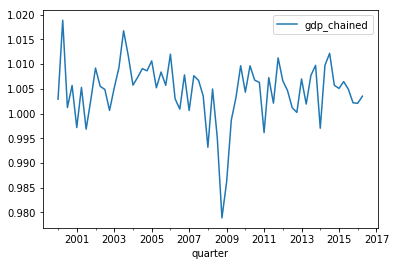

In [10]:
df_change[df_change.index.year>=2000].plot()

In [11]:
df_change = df_change[df_change.index.year>=2000]

In [18]:
df_change['2008Q1':]

,gdp_chained
quarter,
2008Q1,0.993176
2008Q2,1.004963
2008Q3,0.995202
2008Q4,0.978874
2009Q1,0.986143
2009Q2,0.998650
2009Q3,1.003267
2009Q4,1.009679
2010Q1,1.004325


In [13]:
rec_start = None
rec_end = None
rec_flag = False
for x in range(len(df_change)-1):
    if df_change.iloc[x].values<1 and df_change.iloc[x+1].values<1:
        print(df_change.index[x])
        if not rec_flag:
            rec_flag = True
            rec_start = df_change.index[x]

print(rec_start)            

2008Q3
2008Q4
2009Q1
2008Q3


In [4]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    
    df = pd.read_excel("gdplev.xls", header=None, parse_cols="E:G", skiprows=8)
    df.drop(columns=1, inplace=True)
    df.columns = ['quarter', 'gdp_chained']
    df['quarter'] = pd.PeriodIndex(df['quarter'], freq='Q')
    df.set_index('quarter', inplace=True)
    df_change = df.diff()
    df_change = df_change[df_change.index.year>=2000]
    rec_start = None
    rec_end = None
    rec_flag = False
    for x in range(len(df_change)-1):
        if df_change.iloc[x].values<0 and df_change.iloc[x+1].values<0:
            if not rec_flag:
                rec_flag = True
                rec_start = df_change.index[x]
        if df_change.iloc[x].values>0 and df_change.iloc[x+1].values>0:
            if rec_flag:
                rec_flag = False
                rec_end = df_change.index[x+1]
    
    return str(rec_end)

In [27]:
get_recession_end()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """


'2009Q4'

In [24]:
df = pd.read_excel("gdplev.xls", header=None, parse_cols="E:G", skiprows=8)
df.drop(columns=1, inplace=True)
df.columns = ['quarter', 'gdp_chained']
df['quarter'] = pd.PeriodIndex(df['quarter'], freq='Q')
df.set_index('quarter', inplace=True)
df_change = df.diff()
df_change = df_change[df_change.index.year>=2000]
rec_start = None
rec_end = None
rec_flag = False
for x in range(len(df_change)-1):
    if df_change.iloc[x].values<0 and df_change.iloc[x+1].values<0:
#             print(df_change.index[x])
        if not rec_flag:
            rec_flag = True
            rec_start = df_change.index[x]
    if df_change.iloc[x].values>0 and df_change.iloc[x+1].values>0:
        if rec_flag:
            rec_flag = False
            rec_end = df_change.index[x+1]

# print(rec_start)
# print(rec_end)
# print(rec_flag)

2008Q3
2009Q4
False


/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """Entry point for launching an IPython kernel.


In [25]:
df['2008Q1':]

,gdp_chained
quarter,
2008Q1,14889.5
2008Q2,14963.4
2008Q3,14891.6
2008Q4,14577.0
2009Q1,14375.0
2009Q2,14355.6
2009Q3,14402.5
2009Q4,14541.9
2010Q1,14604.8


In [28]:
rec_start

2008Q3
2009Q4
False


In [5]:
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3'''
    
    df = pd.read_excel("gdplev.xls", header=None, parse_cols="E:G", skiprows=8)
    df.drop(columns=1, inplace=True)
    df.columns = ['quarter', 'gdp_chained']
    df['quarter'] = pd.PeriodIndex(df['quarter'], freq='Q')
    df.set_index('quarter', inplace=True)
    df_change = df.diff()
    df_change = df_change[df_change.index.year>=2000]
    rec_start = None
    rec_end = None
    rec_flag = False
    for x in range(len(df_change)-1):
        if df_change.iloc[x].values<0 and df_change.iloc[x+1].values<0:
    #             print(df_change.index[x])
            if not rec_flag:
                rec_flag = True
                rec_start = df_change.index[x]
        if df_change.iloc[x].values>0 and df_change.iloc[x+1].values>0:
            if rec_flag:
                rec_flag = False
                rec_end = df_change.index[x+1]
    
    rec_min = str(df[rec_start: rec_end].idxmin()[0])
    
    return rec_min

In [41]:
get_recession_bottom()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """


'2009Q2'

In [30]:
df[rec_start: rec_end]

,gdp_chained
quarter,
2008Q3,14891.6
2008Q4,14577.0
2009Q1,14375.0
2009Q2,14355.6
2009Q3,14402.5
2009Q4,14541.9


In [39]:
str(df[rec_start: rec_end].idxmin()[0])

'2009Q2'

In [6]:
def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    
    df = pd.read_csv('City_Zhvi_AllHomes.csv')
    df = df.set_index(['State', 'RegionName']).iloc[:, 4:]
    df = (df.groupby(pd.PeriodIndex(df.columns, freq='Q-DEC'), axis=1)
            .mean()
            .loc[:, '2000Q1':'2016q3']
            .rename(columns=lambda c: str(c).lower())
             .set_index(['State', 'RegionName']))
    return df

In [28]:
convert_housing_data_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
CA,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
IL,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
PA,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
AZ,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
NV,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
CA,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
TX,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
CA,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


In [75]:
df = pd.read_csv('City_Zhvi_AllHomes.csv')
df

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
5,18959,Las Vegas,NV,Las Vegas,Clark,6,121600.0,120900.0,120400.0,120300.0,...,190600,192000,193600,194800,195400,196100,197300,198200,199300,200600
6,54296,San Diego,CA,San Diego,San Diego,7,161100.0,160700.0,160400.0,160100.0,...,525700,526700,527800,529200,531000,533900,536900,537900,539000,540500
7,38128,Dallas,TX,Dallas-Fort Worth,Dallas,8,NaN,NaN,NaN,NaN,...,134600,136600,138700,140600,142200,143300,144500,146000,148200,150400
8,33839,San Jose,CA,San Jose,Santa Clara,9,224500.0,224900.0,225400.0,226100.0,...,789700,792100,795800,803100,811900,817600,819100,820100,821700,822700
9,25290,Jacksonville,FL,Jacksonville,Duval,10,77500.0,77200.0,76800.0,76600.0,...,132000,132500,133100,133900,134900,136000,137200,138400,139500,140300


In [68]:
convert_housing_data_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
CA,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
IL,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
PA,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
AZ,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
NV,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
CA,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
TX,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
CA,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


In [76]:

df = pd.read_csv('City_Zhvi_AllHomes.csv')
df

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
5,18959,Las Vegas,NV,Las Vegas,Clark,6,121600.0,120900.0,120400.0,120300.0,...,190600,192000,193600,194800,195400,196100,197300,198200,199300,200600
6,54296,San Diego,CA,San Diego,San Diego,7,161100.0,160700.0,160400.0,160100.0,...,525700,526700,527800,529200,531000,533900,536900,537900,539000,540500
7,38128,Dallas,TX,Dallas-Fort Worth,Dallas,8,NaN,NaN,NaN,NaN,...,134600,136600,138700,140600,142200,143300,144500,146000,148200,150400
8,33839,San Jose,CA,San Jose,Santa Clara,9,224500.0,224900.0,225400.0,226100.0,...,789700,792100,795800,803100,811900,817600,819100,820100,821700,822700
9,25290,Jacksonville,FL,Jacksonville,Duval,10,77500.0,77200.0,76800.0,76600.0,...,132000,132500,133100,133900,134900,136000,137200,138400,139500,140300


In [ ]:
df.groupby(pd.PeriodIndex(df.columns, freq='Q'), axis=1

In [51]:
df = df.set_index(['State', 'RegionName']).iloc[:, 4:]
df

,,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
State,RegionName,,,,,,,,,,,,,,,,,,,,,
NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
CA,Los Angeles,155000.0,154600.0,154400.0,154200.0,154100.0,154300.0,154300.0,154200.0,154800.0,155900.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
IL,Chicago,109700.0,109400.0,109300.0,109300.0,109100.0,109000.0,109000.0,109600.0,110200.0,110800.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
PA,Philadelphia,50000.0,49900.0,49600.0,49400.0,49400.0,49300.0,49300.0,49400.0,49700.0,49600.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
AZ,Phoenix,87200.0,87700.0,88200.0,88400.0,88500.0,88900.0,89400.0,89700.0,90100.0,90700.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
NV,Las Vegas,121600.0,120900.0,120400.0,120300.0,120200.0,120300.0,120500.0,120900.0,121400.0,122100.0,...,190600,192000,193600,194800,195400,196100,197300,198200,199300,200600
CA,San Diego,161100.0,160700.0,160400.0,160100.0,159600.0,159100.0,158700.0,158500.0,158700.0,159800.0,...,525700,526700,527800,529200,531000,533900,536900,537900,539000,540500
TX,Dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134600,136600,138700,140600,142200,143300,144500,146000,148200,150400
CA,San Jose,224500.0,224900.0,225400.0,226100.0,227100.0,228100.0,229300.0,230900.0,233400.0,236500.0,...,789700,792100,795800,803100,811900,817600,819100,820100,821700,822700


In [62]:
df.groupby(pd.PeriodIndex(df.columns, freq='Q-DEC'), axis=1).mean().loc[:, '2000Q1':'2016q3']

,,2000Q1,2000Q2,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q2,...,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
CA,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
IL,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
PA,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
AZ,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
NV,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
CA,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
TX,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
CA,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


In [59]:
pd.PeriodIndex(df.columns, freq='Q-DEC')

PeriodIndex(['1996Q2', '1996Q2', '1996Q2', '1996Q3', '1996Q3', '1996Q3',
             '1996Q4', '1996Q4', '1996Q4', '1997Q1',
             ...
             '2015Q4', '2015Q4', '2016Q1', '2016Q1', '2016Q1', '2016Q2',
             '2016Q2', '2016Q2', '2016Q3', '2016Q3'],
            dtype='period[Q-DEC]', length=245, freq='Q-DEC')

In [26]:
def run_ttest():
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''
    df_housing_data = (convert_housing_data_to_quarters()
                    .reset_index()
                    .replace({'State': states})
                    .set_index(['State', 'RegionName']))
    df_univ_town = get_list_of_university_towns().set_index(['State', 'RegionName'])
    df_price_ratio = df_housing_data[['2008q2','2009q2']]
    price_ratio = df_price_ratio['2008q2'] / df_price_ratio['2009q2']
    df_price_ratio = df_price_ratio.assign(ratio= price_ratio)
    univ_town_ratio = pd.merge(df_price_ratio, df_univ_town, how='inner', left_index=True, right_index=True).loc[:, 'ratio']
    non_univ_town_ratio = df_price_ratio[~df_price_ratio.index.isin(univ_town_ratio.index)].loc[:, 'ratio']
    testResult = ttest_ind(univ_town_ratio, non_univ_town_ratio, nan_policy='omit')
    if testResult.pvalue < 0.05:
        different = True
        if univ_town_ratio.mean() < non_univ_town_ratio.mean():
            better = "university town"
        else:
            better = "non-university town"
    else:
        different = False
        better = "university town"
    p = testResult.pvalue
    
    
    return (different, p, better)

In [27]:
run_ttest()

(True, 0.002724063704753125, 'university town')

In [10]:
get_list_of_university_towns()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
5,Alabama,Troy
6,Alabama,Tuscaloosa
7,Alabama,Tuskegee
8,Alaska,Fairbanks
9,Arizona,Flagstaff


In [11]:
convert_housing_data_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
CA,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
IL,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
PA,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
AZ,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
NV,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
CA,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
TX,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
CA,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


In [12]:
df_housing_data = (convert_housing_data_to_quarters()
                    .reset_index()
                    .replace({'State': states})
                    .set_index(['State', 'RegionName']))

In [13]:
df_housing_data

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
California,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
Illinois,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
Pennsylvania,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
Arizona,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
Nevada,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
California,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
Texas,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
California,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


In [14]:
df_univ_town = get_list_of_university_towns().set_index(['State', 'RegionName'])
pd.merge(df_housing_data, df_univ_town, how='inner', left_index=True, right_index=True)

2000q1         2000q2         2000q3  \
State      RegionName                                                     
Alabama    Montevallo        97000.000000   96800.000000   96533.333333   
           Tuscaloosa       104500.000000  106033.333333  108500.000000   
Alaska     Fairbanks        163200.000000  165033.333333  169300.000000   
Arizona    Flagstaff        161300.000000  164100.000000  165466.666667   
           Tempe            128100.000000  129933.333333  131100.000000   
           Tucson           101833.333333  102966.666667  104466.666667   
Arkansas   Conway            85866.666667   87166.666667   88366.666667   
           Fayetteville     107933.333333  110333.333333  112566.666667   
California Arcata           130033.333333  140933.333333  149200.000000   
           Berkeley         395633.333333  431033.333333  464366.666667   
           Chico            128766.666667  132666.666667  137200.000000   
           Claremont        253766.666667  260633.333333  268066.666667   
           Cotati           240966.666667  254800.000000  277133.333333   
           Davis            238366.666667  249833.333333  256466.666667   
           Irvine           326966.666667  336966.666667  341733.333333   
           Merced           111533.333333  117033.333333  119166.666667   
           Orange           255133.333333  261766.666667  270533.333333   
           Palo Alto        766966.666667  842600.000000  903566.666667   
           Pomona           131400.000000  135133.333333  137333.333333   
           Redlands         152900.000000  156333.333333  159000.000000   
           Riverside        137166.666667  139666.666667  141300.000000   
           Sacramento       122433.333333  126000.000000  129466.666667   
           San Diego        222900.000000  234366.666667  245433.333333   
           San Luis Obispo  263500.000000  271200.000000  287133.333333   
           Santa Barbara    463466.666667  488300.000000  510800.000000   
           Santa Cruz       363933.333333  386733.333333  407166.666667   
           Turlock          128633.333333  131033.333333  136000.000000   
           Whittier         201666.666667  208000.000000  214700.000000   
Colorado   Boulder          277000.000000  286733.333333  300500.000000   
           Durango          170300.000000  177700.000000  178933.333333   
...                                   ...            ...            ...   
Texas      Canyon            74233.333333   76200.000000   77866.666667   
           College Station  127300.000000  128833.333333  128766.666667   
           Commerce          69100.000000   72900.000000   75433.333333   
           Dallas            84466.666667   83866.666667   84866.666667   
           Denton           119433.333333  121366.666667  122833.333333   
           Georgetown       149166.666667  148700.000000  151966.666667   
           Keene             72200.000000   74200.000000   74600.000000   
           Lubbock                    NaN            NaN            NaN   
           Stephenville     100300.000000  101300.000000  101766.666667   
Utah       Orem             145366.666667  148566.666667  151800.000000   
           Provo            140466.666667  144300.000000  148500.000000   
           Salt Lake City   154200.000000  154700.000000  154300.000000   
Vermont    Burlington       136400.000000  140066.666667  142666.666667   
           Castleton                  NaN            NaN            NaN   
Virginia   Charlottesville  146233.333333  149700.000000  155200.000000   
           Chesapeake       121200.000000  122733.333333  123300.000000   
           Fredericksburg   127666.666667  129666.666667  130966.666667   
           Williamsburg     173066.666667  175100.000000  176300.000000   
           Wise              48766.666667   49500.000000   49466.666667   
Washington Bellingham       156000.000000  160000.000000  163033.333333   
           Cheney           114133.333333  113700.000000  11

In [15]:
get_recession_bottom()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """


'2009Q2'

In [120]:
get_recession_start()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """


'2008Q3'

In [124]:
df_housing_data[['2008q2','2009q2']]


,,2008q2,2009q2
State,RegionName,,
New York,New York,5.039333e+05,4.658333e+05
California,Los Angeles,5.022667e+05,4.139000e+05
Illinois,Chicago,2.379000e+05,2.197000e+05
Pennsylvania,Philadelphia,1.181333e+05,1.161667e+05
Arizona,Phoenix,2.052667e+05,1.682333e+05
Nevada,Las Vegas,2.323000e+05,1.643333e+05
California,San Diego,4.414000e+05,3.895000e+05
Texas,Dallas,1.153667e+05,1.051000e+05
California,San Jose,6.117333e+05,5.303000e+05


In [16]:
df_price_ratio = df_housing_data[['2008q2','2009q2']]
price_ratio = df_price_ratio['2008q2'] / df_price_ratio['2009q2']
df_price_ratio = df_price_ratio.assign(ratio= price_ratio)


In [17]:
df_price_ratio

,,2008q2,2009q2,ratio
State,RegionName,,,
New York,New York,5.039333e+05,4.658333e+05,1.081789
California,Los Angeles,5.022667e+05,4.139000e+05,1.213498
Illinois,Chicago,2.379000e+05,2.197000e+05,1.082840
Pennsylvania,Philadelphia,1.181333e+05,1.161667e+05,1.016930
Arizona,Phoenix,2.052667e+05,1.682333e+05,1.220131
Nevada,Las Vegas,2.323000e+05,1.643333e+05,1.413590
California,San Diego,4.414000e+05,3.895000e+05,1.133248
Texas,Dallas,1.153667e+05,1.051000e+05,1.097685
California,San Jose,6.117333e+05,5.303000e+05,1.153561


In [18]:
pd.merge(df_price_ratio, df_univ_town, how='inner', left_index=True, right_index=True)

2008q2        2009q2     ratio
State      RegionName                                           
Alabama    Montevallo       1.190000e+05  1.252000e+05  0.950479
           Tuscaloosa       1.393667e+05  1.369333e+05  1.017770
Alaska     Fairbanks        2.547333e+05  2.258333e+05  1.127970
Arizona    Flagstaff        3.249333e+05  2.996000e+05  1.084557
           Tempe            2.335333e+05  2.075000e+05  1.125462
           Tucson           1.806000e+05  1.643667e+05  1.098763
Arkansas   Conway           1.227333e+05  1.231667e+05  0.996482
           Fayetteville     1.721000e+05  1.618000e+05  1.063659
California Arcata           3.332333e+05  2.993333e+05  1.113252
           Berkeley         6.866667e+05  6.430000e+05  1.067911
           Chico            2.877000e+05  2.674333e+05  1.075782
           Claremont        5.435000e+05  4.951667e+05  1.097610
           Cotati           3.979000e+05  3.376333e+05  1.178497
           Davis            4.681667e+05  4.807000e+05  0.973927
           Irvine           6.695667e+05  6.099333e+05  1.097770
           Merced           2.071000e+05  1.470667e+05  1.408205
           Orange           5.585667e+05  4.571000e+05  1.221979
           Palo Alto        1.326033e+06  1.227667e+06  1.080125
           Pomona           3.382000e+05  2.256667e+05  1.498671
           Redlands         3.277000e+05  2.956667e+05  1.108343
           Riverside        3.436667e+05  2.364667e+05  1.453341
           Sacramento       2.503000e+05  1.998000e+05  1.252753
           San Diego        4.414000e+05  3.895000e+05  1.133248
           San Luis Obispo  5.485667e+05  5.245000e+05  1.045885
           Santa Barbara    9.726667e+05  8.775333e+05  1.108410
           Santa Cruz       6.344333e+05  6.071000e+05  1.045023
           Turlock          2.398000e+05  1.850000e+05  1.296216
           Whittier         4.535000e+05  3.773333e+05  1.201855
Colorado   Boulder          4.228333e+05  4.222000e+05  1.001500
           Durango          3.560667e+05  3.366667e+05  1.057624
...                                  ...           ...       ...
Texas      Canyon           1.097667e+05  1.164000e+05  0.943013
           College Station  1.628667e+05  1.688667e+05  0.964469
           Commerce         6.633333e+04  6.646667e+04  0.997994
           Dallas           1.153667e+05  1.051000e+05  1.097685
           Denton           1.378333e+05  1.307667e+05  1.054040
           Georgetown       2.000667e+05  1.923333e+05  1.040208
           Keene            9.760000e+04  9.590000e+04  1.017727
           Lubbock          9.386667e+04  1.049000e+05  0.894820
           Stephenville     1.064333e+05  1.352667e+05  0.786841
Utah       Orem             2.365667e+05  2.263000e+05  1.045368
           Provo            2.169333e+05  2.245000e+05  0.966295
           Salt Lake City   2.494667e+05  2.703000e+05  0.922925
Vermont    Burlington       2.273333e+05  2.435000e+05  0.933607
           Castleton        1.639000e+05  1.669333e+05  0.981829
Virginia   Charlottesville  2.840667e+05  2.705000e+05  1.050154
           Chesapeake       2.582667e+05  2.430000e+05  1.062826
           Fredericksburg   2.462667e+05  2.237333e+05  1.100715
           Williamsburg     3.223667e+05  3.062667e+05  1.052569
           Wise             1.126333e+05  1.195000e+05  0.942538
Washington Bellingham       2.982667e+05  2.881333e+05  1.035169
           Cheney           1.868667e+05  1.746667e+05  1.069847
           Ellensburg       2.048333e+05  2.000333e+05  1.023996
Wisconsin  Appleton         1.235667e+05  1.182000e+05  1.045403
           Eau Claire       1.327667e+05  1.304333e+05  1.017889
           Green Bay        1.179667e+05  1.143000e+05  1.032079
           La Crosse        1.184333e+05  1.119333e+05  1.058070
           Madison          1.944667e+05  1.914333e+05  1.015845
           Milwaukee        1.312333e+05  1.167333e+05  1.124215
           Oshkosh          1.319667e+05  1.212000e+05  1.088834
    

In [19]:
univ_town_ratio = pd.merge(df_price_ratio, df_univ_town, how='inner', left_index=True, right_index=True).loc[:, 'ratio']

In [142]:
len(univ_town_ratio)

269

In [ ]:
df_price_ratio[~df_price_ratio.index.isin(univ_town_ratio.index)]

In [20]:
non_univ_town_ratio = df_price_ratio[~df_price_ratio.index.isin(univ_town_ratio.index)].loc[:, 'ratio']

In [156]:
len(non_univ_town_ratio)

10461

In [161]:
univ_town_ratio.mean()

1.0545645283851426

In [162]:
non_univ_town_ratio.mean()

1.0751962209307955

In [21]:
ttest_ind(univ_town_ratio, non_univ_town_ratio, nan_policy='omit')

Ttest_indResult(statistic=-2.998032664179183, pvalue=0.002724063704753125)

In [23]:
aaa = ttest_ind(univ_town_ratio, non_univ_town_ratio, nan_policy='omit')


0.002724063704753125

In [24]:
if aaa.pvalue < 0.05:
    different_ = True
else:
    different_ = False


In [25]:
different_

True

In [153]:
df_housing_data.loc[('Wisconsin','Maribel'),:]

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
Wisconsin,Maribel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130600.0,128966.666667,129633.333333,131266.666667,130133.333333,129733.333333,129300.0,127833.333333,129266.666667,134200.0


In [ ]:
df_univget_list_of_university_towns()

In [ ]:
df_housing_data

In [103]:
df = pd.DataFrame({'col2': {0: 'a', 1: 2, 2: np.nan}, 'col1': {0: 'w', 1: 1, 2: 2}})
di = {1: "A", 2: "B", 'w': 'wcwcwcwc'}
df

,col2,col1
0,a,w
1,2,1
2,NaN,2


In [104]:
df.replace({"col1": di})

,col2,col1
0,a,wcwcwcwc
1,2,A
2,NaN,B


In [88]:
D = pd.DataFrame()
D['z'] = [2]


def funz2(z):
    d = pd.DataFrame()
    d['z'] = [z]
    D = d
    print(d)
    print('====')
    print(D)


funz2(4)
print('====')
print(D)

   z
0  4
====
   z
0  4
====
   z
0  2


In [93]:
a = 'sdasda'

def my_function():
#     print(a)
    a = 555
    print(a)

my_function()
a

555


'sdasda'